# Mutation Rate and Mutation Frequency analysis 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Metastatic Breast Cancer (INSERM, PLoS Med 2016)")

# TRIPLE-NEGATIVE 

In [3]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_Lefebvre_et_al_INSERM_PLoSMed2016_TN.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]
data_mutation_ductal_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,MBC_182,MBC_182,LUZP1,1,23419111,23419111,Missense_Mutation,SNP,G,G,C,ENST00000302291.4:c.1644C>G,p.N548K,548.0,ENST00000302291,93786
1,MBC_182,MBC_182,ARID1A,1,27059208,27059208,Silent,SNP,C,C,A,ENST00000324856.7:c.1845C>A,p.A615=,615.0,ENST00000324856,86072
2,MBC_182,MBC_182,GRIK3,1,37324766,37324766,Missense_Mutation,SNP,C,C,A,ENST00000373091.3:c.1047G>T,p.Q349H,349.0,ENST00000373091,238603
3,MBC_182,MBC_182,RRAGC,1,39305274,39305274,Missense_Mutation,SNP,G,G,C,ENST00000373001.3:c.1151C>G,p.S384C,384.0,ENST00000373001,21626
4,MBC_182,MBC_182,JUN,1,59248632,59248632,Missense_Mutation,SNP,G,G,C,ENST00000371222.2:c.111C>G,p.S37R,37.0,ENST00000371222,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,MBC_80,MBC_80,SCN5A,3,38647565,38647566,Frame_Shift_Ins,INS,-,CACCAGGTAG,CACCAGGTAG,ENST00000413689.1:c.1214_1215insCTACCTGGTG,p.N406Yfs*15,405.0,ENST00000413689,101617
4286,MBC_80,MBC_80,COL6A6,3,130345394,130345395,Splice_Region,INS,-,TTGTA,TTGTA,ENST00000358511.6:c.4941+4_4941+5insTGTAT,p.X1647_splice,1647.0,ENST00000358511,117822
4287,MBC_80,MBC_80,CARD6,5,40852576,40852577,Frame_Shift_Ins,INS,-,C,C,ENST00000254691.5:c.1143dup,p.T382Hfs*7,381.0,ENST00000254691,18990
4288,MBC_80,MBC_80,PTPRK,6,128643175,128643176,Intron,INS,-,GATGATTACCT,GATGATTACCT,ENST00000368213.5:c.495+8_495+9insAGGTAATCATC,*165*,NaN,ENST00000368213,551947


In [4]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

### Mutation Rate analysis

In [5]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1

In [6]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

51

In [7]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]

In [8]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [9]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]

In [10]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

3401

In [11]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [12]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()

In [13]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN

In [14]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000

In [15]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [16]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [17]:
patients=np.arange(0,51,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

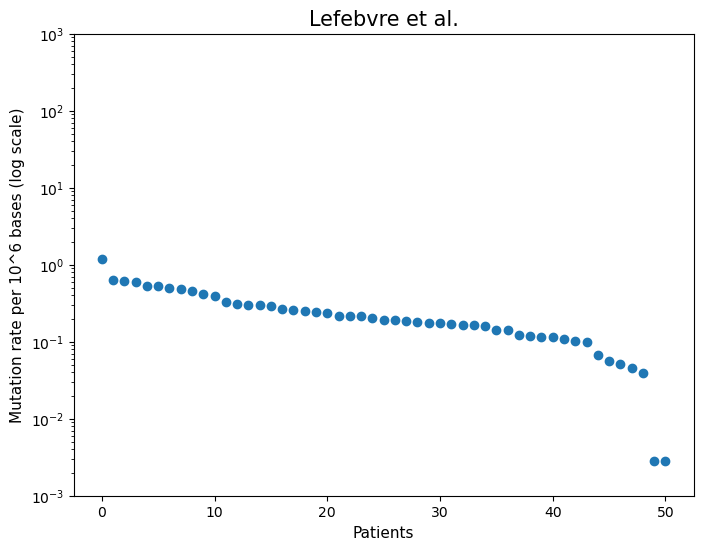

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("Lefebvre et al.", fontsize=15)
plt.show()

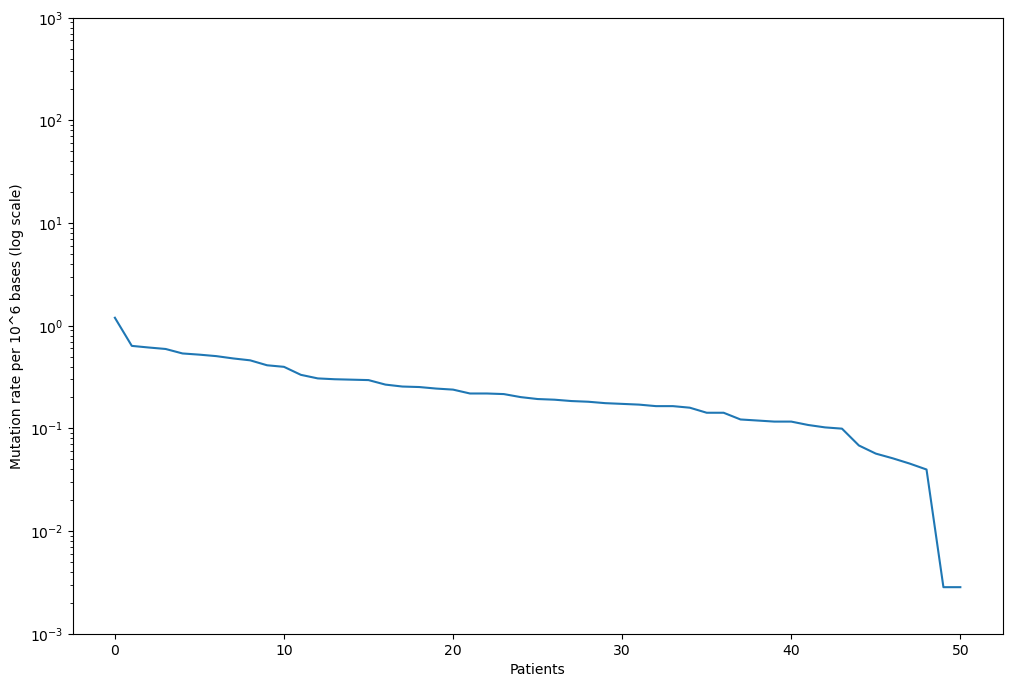

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [20]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [21]:
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()

In [22]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [23]:
tot_pts_ductal_TN = 51

In [24]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN

In [25]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [26]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [27]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)

In [28]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

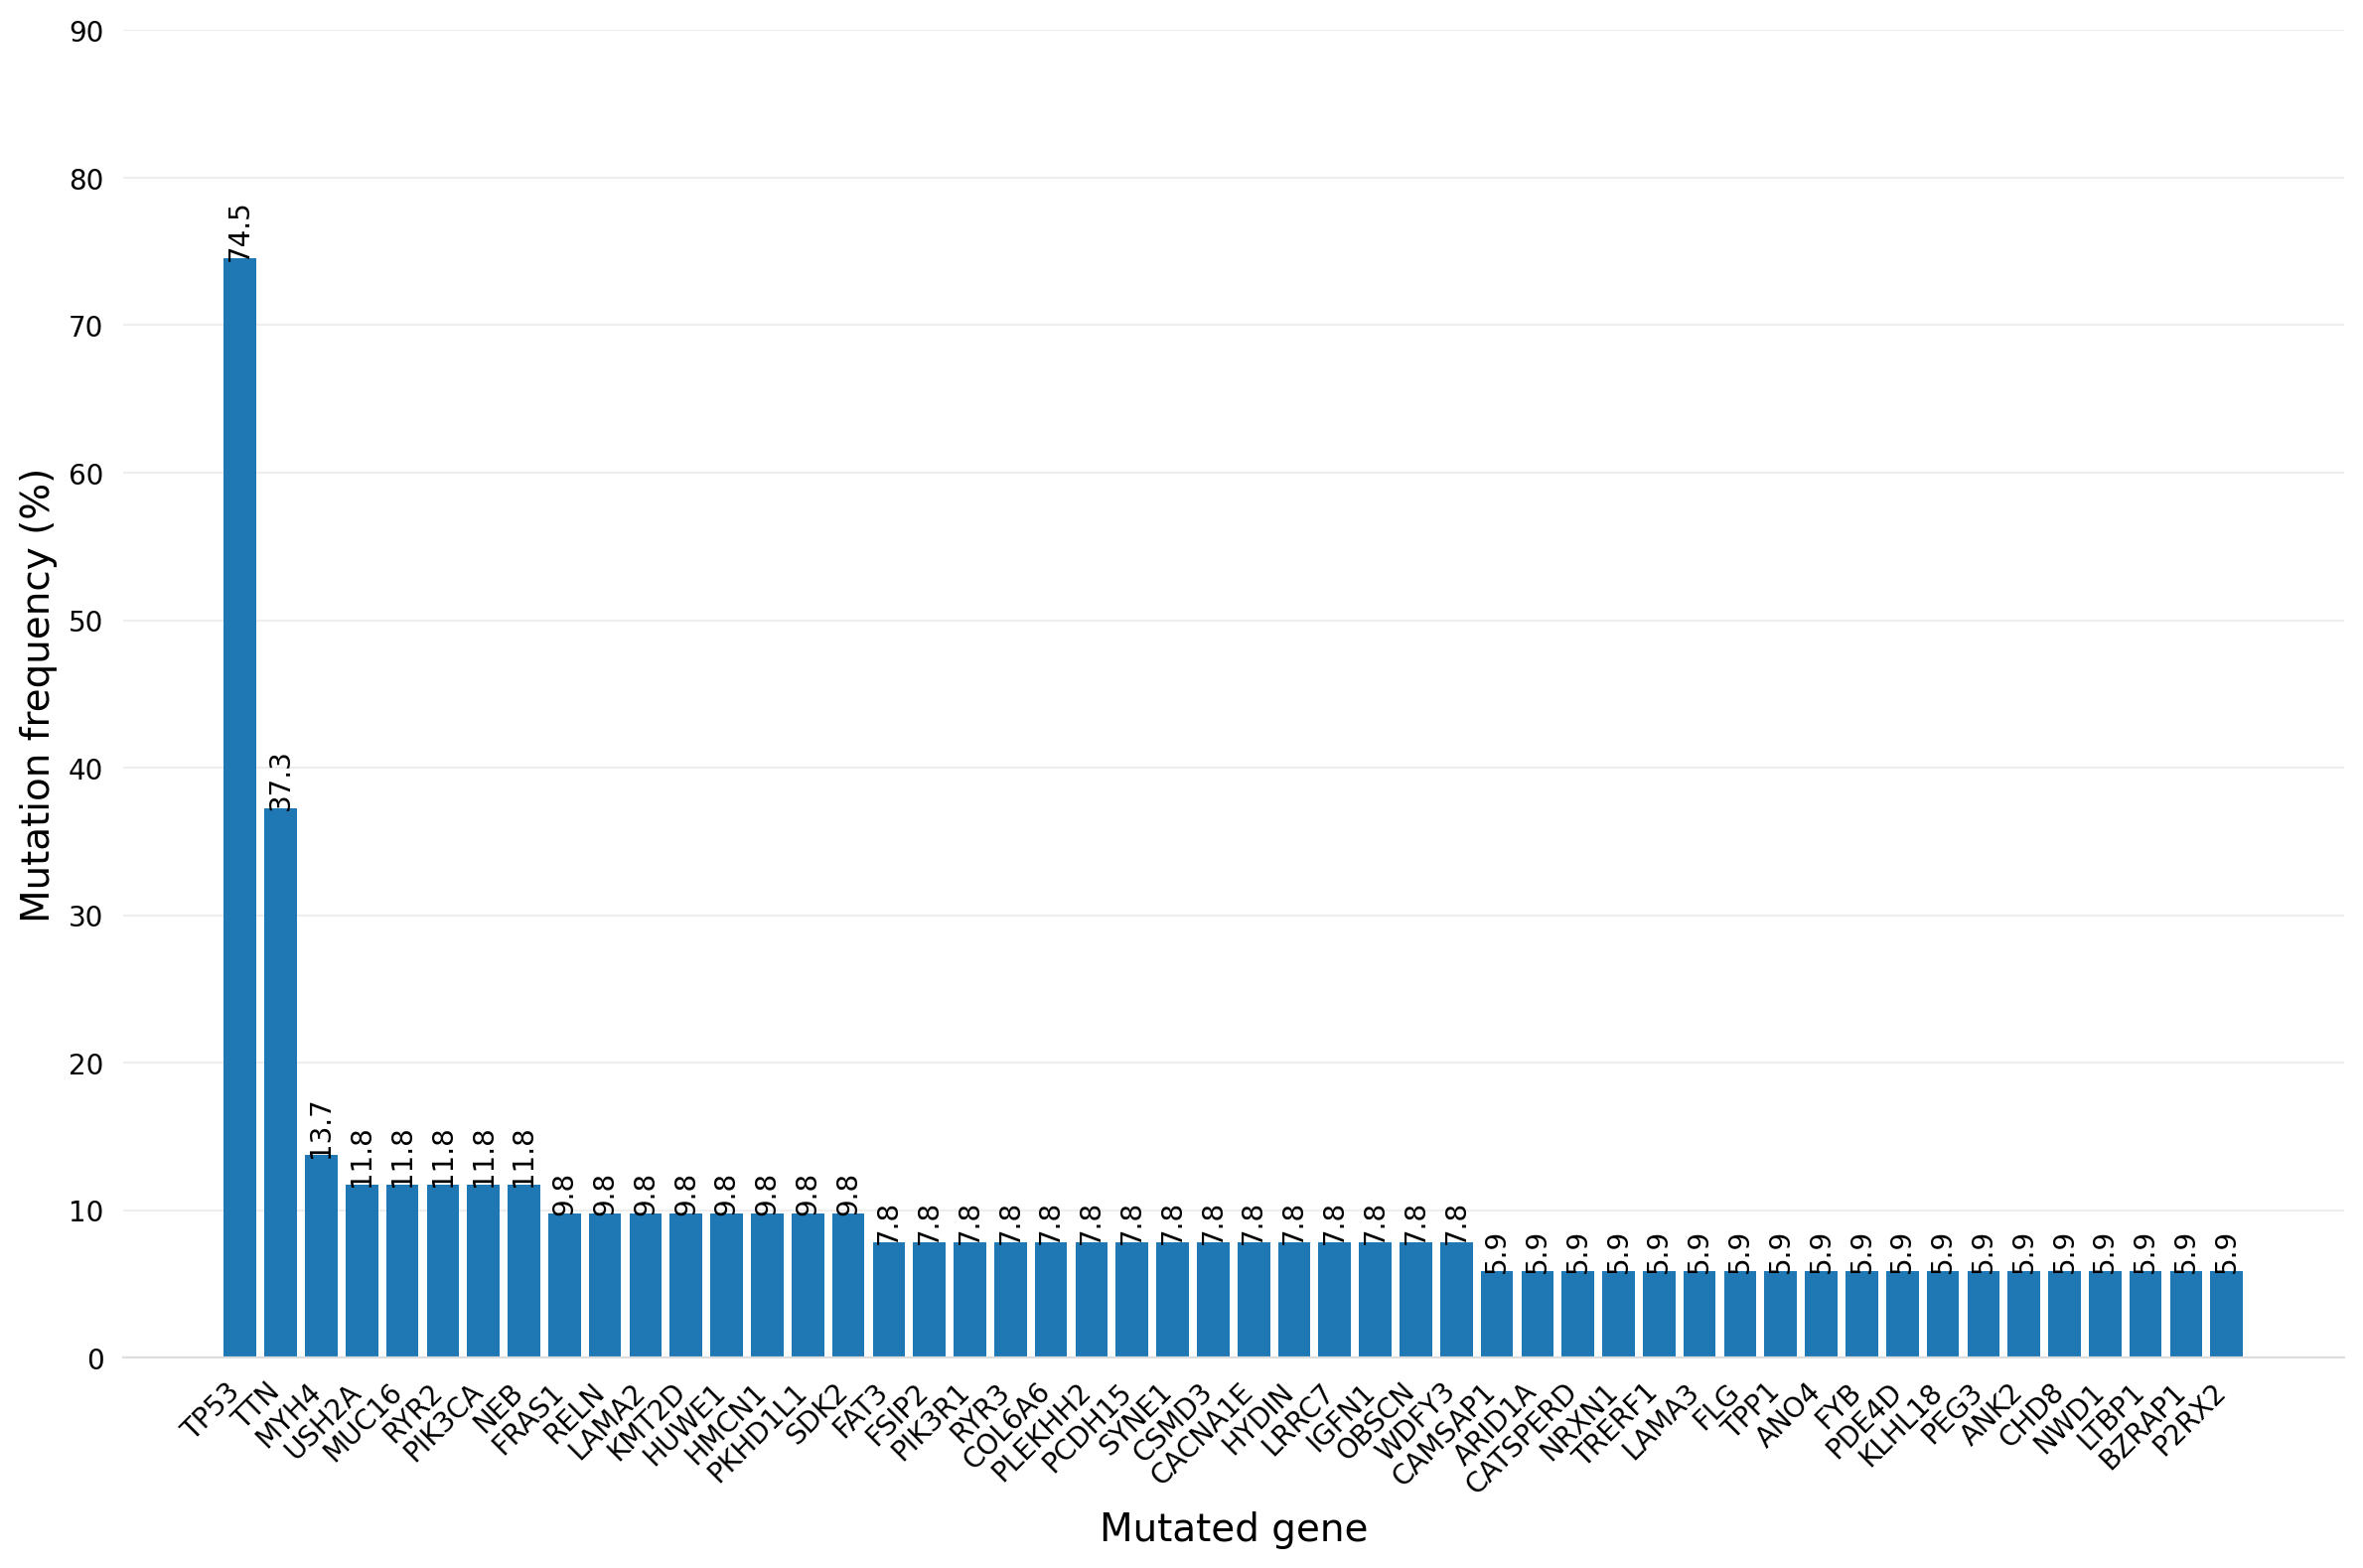

In [29]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# NON TRIPLE-NEGATIVE 

In [30]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_Lefebvre_et_al_INSERM_PLoSMed2016_NON_TN.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]
data_mutation_ductal_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,MBC_183,MBC_183,SNRNP40,1,31769527,31769527,Silent,SNP,C,C,T,ENST00000263694.4:c.72G>A,p.L24=,24.0,ENST00000263694,37246
1,MBC_183,MBC_183,GJA8,1,147380326,147380326,Missense_Mutation,SNP,A,A,T,ENST00000240986.4:c.244A>T,p.I82F,82.0,ENST00000240986,6448
2,MBC_183,MBC_183,PBX1,1,164781363,164781363,Missense_Mutation,SNP,C,C,T,ENST00000420696.2:c.974C>T,p.S325L,325.0,ENST00000420696,343713
3,MBC_183,MBC_183,CRB1,1,197398576,197398576,Splice_Region,SNP,C,C,T,ENST00000367400.3:c.2677-3C>T,p.X893_splice,NaN,ENST00000367400,276994
4,MBC_183,MBC_183,CAMSAP2,1,200817731,200817731,Missense_Mutation,SNP,A,A,T,ENST00000358823.2:c.1834A>T,p.I612F,612.0,ENST00000358823,121147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18646,MBC_79,MBC_79,WDR87,19,38383556,38383557,Frame_Shift_Ins,INS,-,-,ATAA,ENST00000303868.5:c.2666_2669dup,p.M890Ifs*33,890.0,ENST00000303868,21855
18647,MBC_79,MBC_79,CENPB,20,3766635,3766636,Frame_Shift_Ins,INS,-,-,A,ENST00000379751.4:c.495dup,p.G166Wfs*221,165.0,ENST00000379751,2840
18648,MBC_79,MBC_79,IVNS1ABP,1,185270219,185270220,Frame_Shift_Ins,INS,-,CTTA,CTTA,ENST00000367498.3:c.1004_1005insTAAG,p.K335Nfs*7,335.0,ENST00000367498,20942
18649,MBC_79,MBC_79,NEB,2,152409953,152409954,Frame_Shift_Ins,INS,-,C,C,ENST00000397345.3:c.19690dup,p.E6564Gfs*10,6563.0,ENST00000397345,249152


In [31]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

### Mutation Rate analysis

In [32]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1

In [33]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

162

In [34]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]

In [35]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [36]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]

In [37]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

9688

In [38]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [39]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()

In [40]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN

In [41]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000

In [42]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [43]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [44]:
patients=np.arange(0,162,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

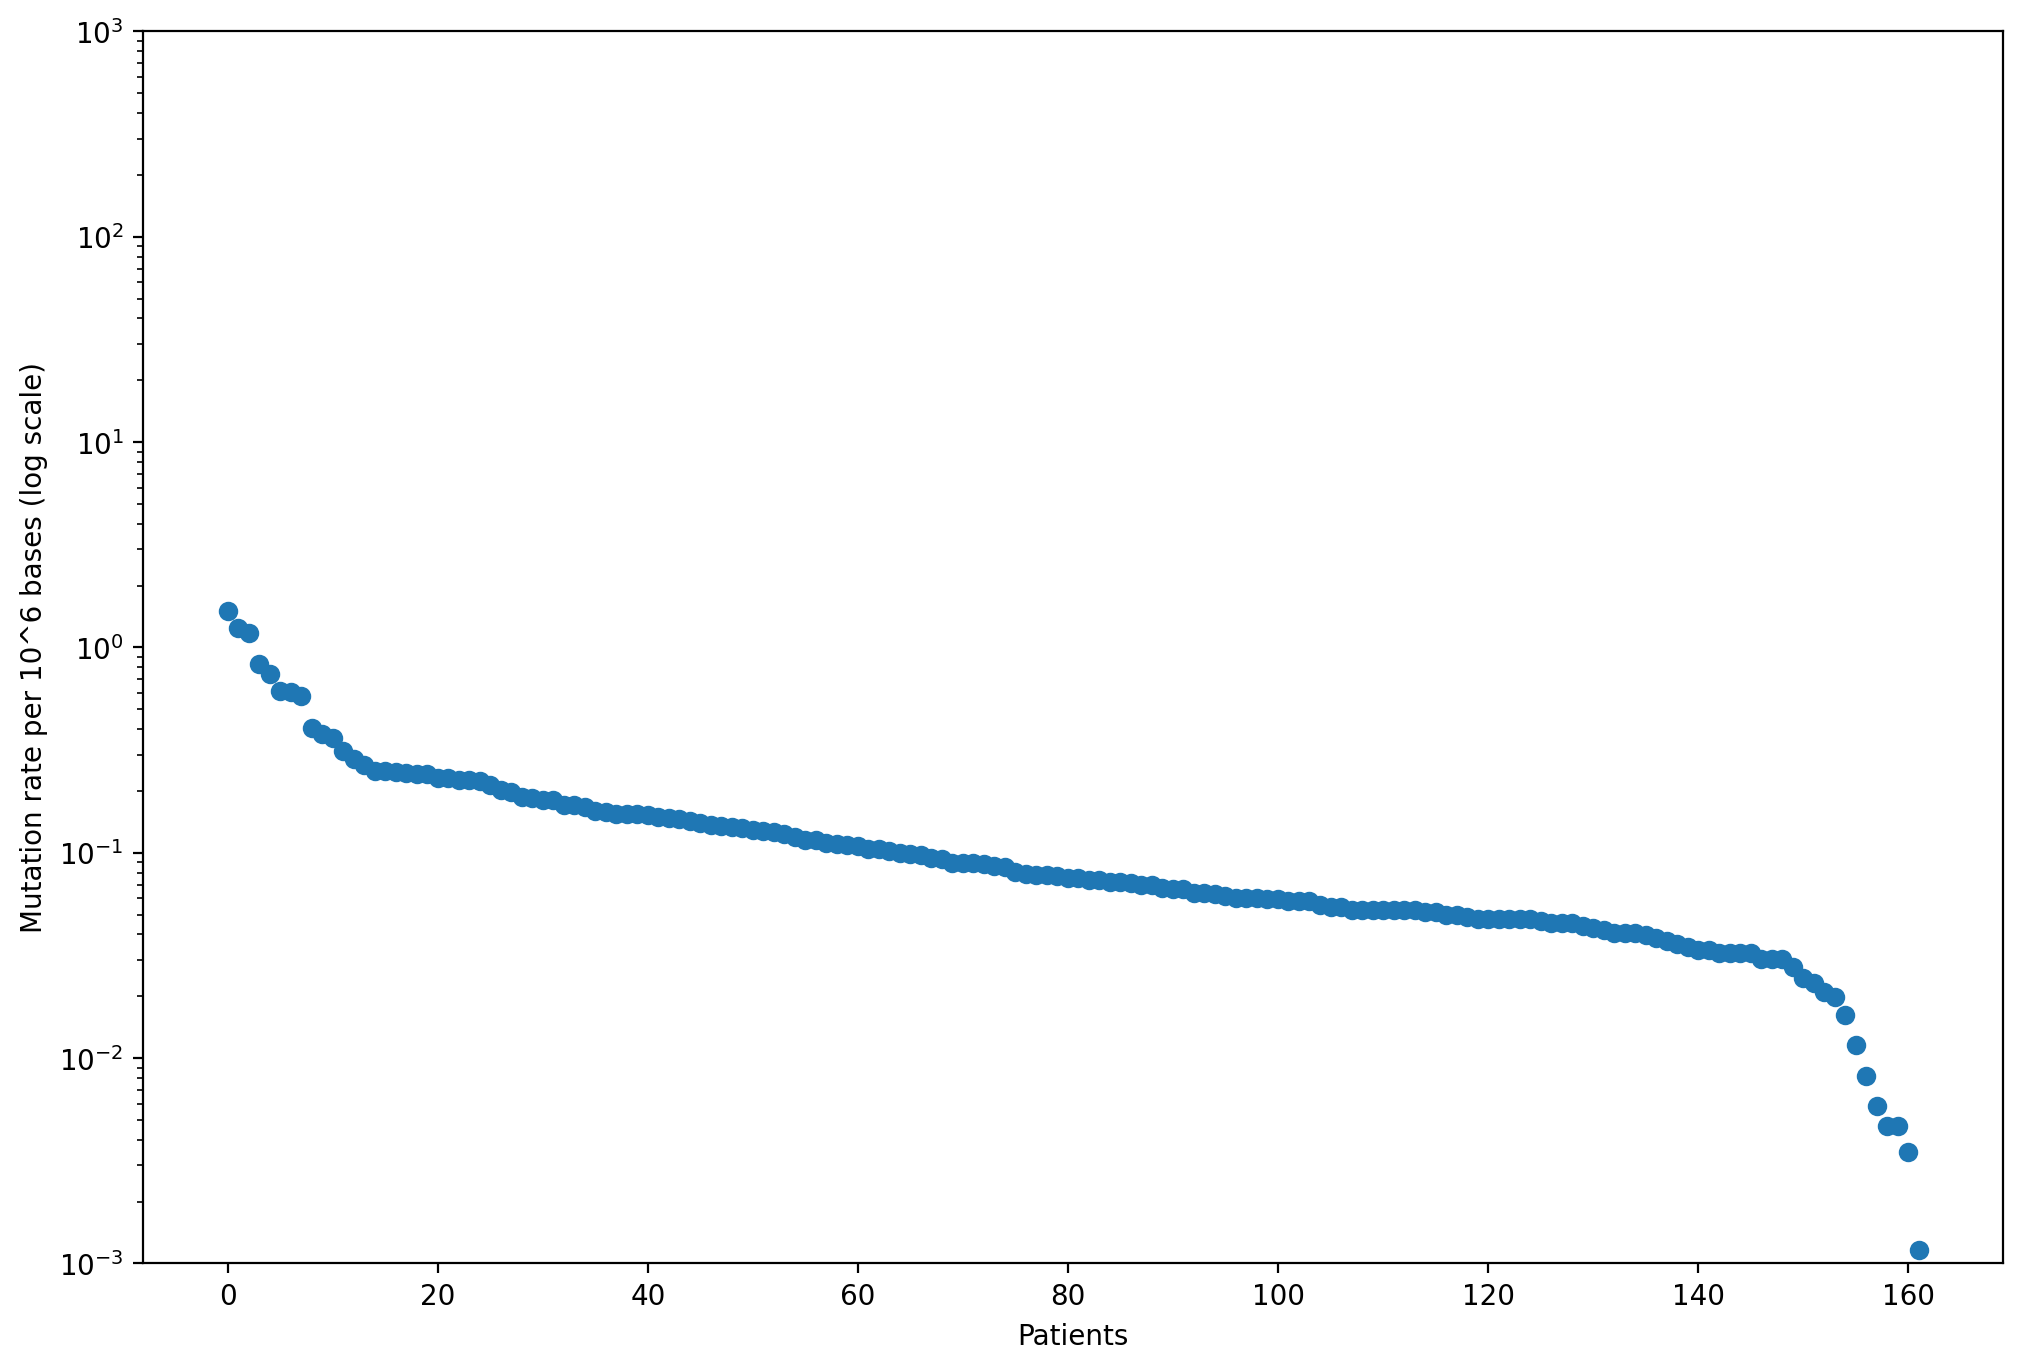

In [45]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [46]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [47]:
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()

In [48]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [49]:
tot_pts_ductal_NON_TN = 162

In [50]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN

In [51]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [52]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [53]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)

In [54]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

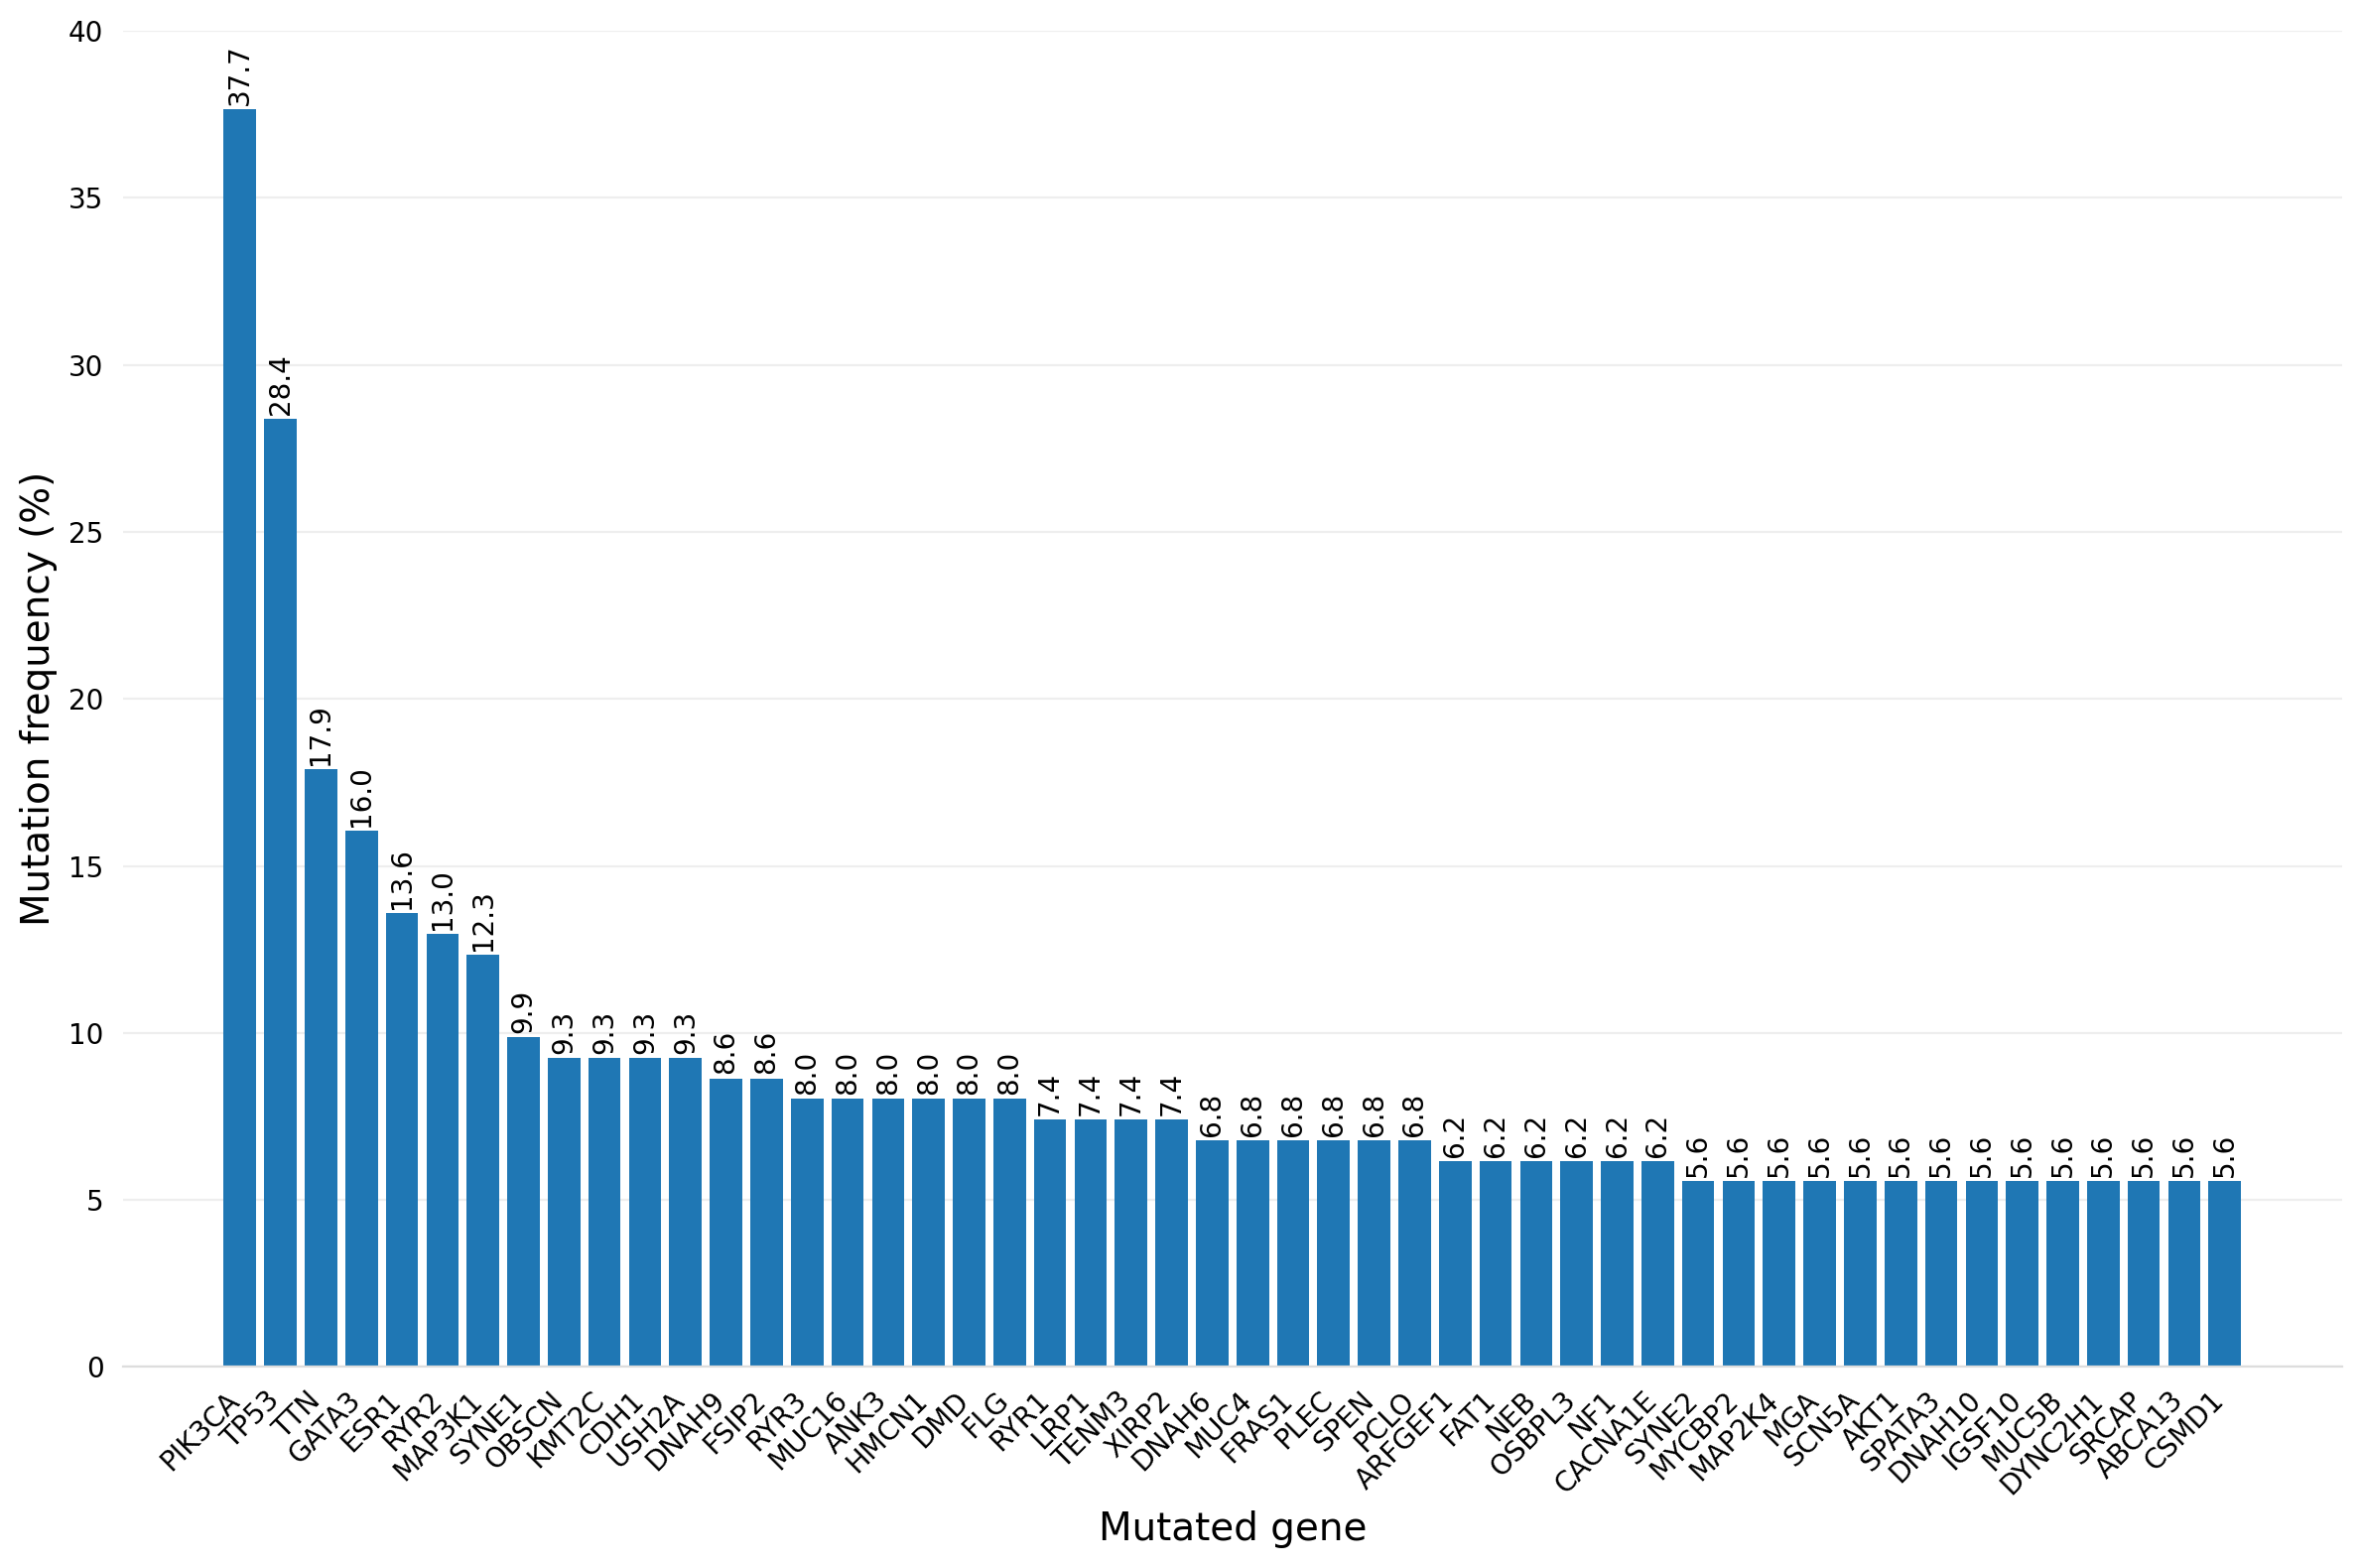

In [55]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 40)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()